# Data Pre-Processing 
#### 1. Encodage --> sklearn.preprocessing
#### 2. Normalisation --> sklearn.preprocessing 
#### 3. Imputation --> sklearn.impute
#### 4. Selection --> sklearn.feature_selection
#### 5. Extraction --> sklearn.feature_extraction

## I. Encodage 
#### Qualitative Data --> Numeric Data 
### 1. ***Ordinal Encoder*** (category|class) --> Unique Value  
   #### --> LabelEncoder()
   #### --> OrdinalEncoder()

### 1.1. LabelEncoder() --> Target Variable Y
#### Limites : 1 dim [y]

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder

In [2]:
y = np.array(['chien','chat','chat','chien','gazelle','chien'])

In [3]:
encoder = LabelEncoder()
encoder.fit_transform(y)

array([1, 0, 0, 1, 2, 1], dtype=int64)

### 1.2. OrdinalEncoder() --> Features Variables (X)

In [4]:
from sklearn.preprocessing import OrdinalEncoder

In [5]:
ordEncoder = OrdinalEncoder()

In [6]:
X = np.array([['chat','chien'],['oiseau','chat'],['chien','chat']])

In [7]:
ordEncoder.fit_transform(X)

array([[0., 1.],
       [2., 0.],
       [1., 0.]])

### 2. OneHot Encoder (category|class) --> Unique Column

### 2.1. LabelBinarize()

In [8]:
from sklearn.preprocessing import LabelBinarizer

In [9]:
labelBinarizer = LabelBinarizer(sparse_output=False)

y = np.array(['chat','chien','chat','chat','chien','oiseau','chat'])

labelBinarizer.fit_transform(y=y)

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0]])

### 2.2. OneHotEncoder

In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
oneHotEncoder = OneHotEncoder(sparse=False)
X = np.array([['chat','chien'],['chien','chien'],['chat','chien'],['chat','chien']])
oneHotEncoder.fit_transform(X=X)

array([[1., 0., 1.],
       [0., 1., 1.],
       [1., 0., 1.],
       [1., 0., 1.]])

# II. Normalisation

### - fit_transform(X_train) : 
   #### X_train_Scaled = (X_train - X_train_min) / (X_train_max - X_train_min)

### - transform(X_test)
   #### X_test_Scaled = (X_test - X_train_min) / (X_train_max - X_train_min)
   

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris

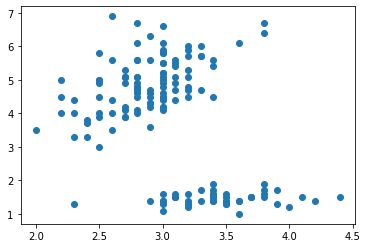

In [13]:
iris = load_iris() 
X = iris.data 

plt.scatter(X[:, 1], X[:, 2])

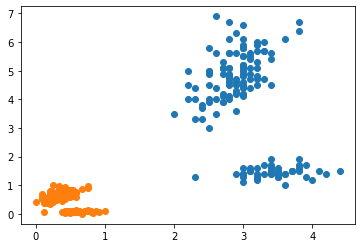

In [14]:
X_minmax = MinMaxScaler().fit_transform(X=X)

plt.scatter(X[:, 1], X[:, 2])
plt.scatter(X_minmax[:, 1], X_minmax[:, 2])

## Pipeline ((Transformer) + (Estimator)) --> Composite Estimator

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split

In [25]:
iris = load_iris()

X = iris.data 
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = make_pipeline(StandardScaler(),
                     SGDClassifier())

model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

In [26]:
model.predict(X_test)

array([1, 1, 0, 1, 2, 2, 2, 1, 2, 0, 0, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0,
       1, 0, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 2, 0])